Considering once again the function $A(a, θ)$, implement gradient ascent with a line search (exact or backtracking) in Python and from the initial state (1.5, 0), verify that you reach the same optimal solution. Produce a table of steps showing how the algorithm converges, and plot the convergence over the contour plot of A(·, ·) [#advancedcalculus]

In [10]:
import matplotlib.pyplot as plt
from numpy import linalg as lp
import pandas as pd
import numpy as np

In [2]:
f = lambda x: np.array((1/2)*((2*(3 - x[0]*(np.sin(x[1]) + 1)) + x[0]*np.cos(x[1]))*x[0]*np.sin(x[1])), 
                       dtype='float')

grad_f = lambda x: np.array([np.sin(x[1])*(3-2*x[0] + x[0]*np.cos(x[1]) - 2*x[0]*np.sin(x[1])),
                           (1/2)*x[0]*(-2*(-3 + x[0])*np.cos(x[1])+x[0]*(np.cos(2*x[1])-2*np.sin(2*x[1])))], 
                            dtype='float')

In [3]:
def backtrack_line_search(f, grad_f, x, alpha=.5, beta=.5, eps=1e-6):
    direction = grad_f(x)/lp.norm(grad_f(x))
    d = np.dot(grad_f(x).T, direction)
    step_size = 1
    while f(x + step_size * direction) < f(x) + step_size * alpha * d:
        step_size *= beta
        if step_size * lp.norm(direction) < eps: break
    return step_size

In [19]:
x1 = np.array([])
x2 = np.array([])
x = np.array([1.5, 0])
tol = np.inf
store = []
k = 0

while tol >= 1e-5:
    step = backtrack_line_search(f, grad_f, x)
    x_new = x + step * grad_f(x) / lp.norm(grad_f(x))
    x1 = np.append(x1, x_new[0])
    x2 = np.append(x2, x_new[1])
    tol = np.linalg.norm(x_new - x, 2)
    x = x_new
    store.append(np.append(x, f(x)))
    k+=1
    
print("\nFunction Value: ", f(x), "\nAt X = ", x, " after", k, "iterations")


Function Value:  1.205771365797318 
At X =  [0.92821686 1.04717959]  after 25 iterations


In [21]:
pd.DataFrame(store, columns=['a', 'θ','A(a, θ)'])

,a,θ,"A(a, θ)"
0,1.500000,0.500000,1.034875
1,1.489436,0.624553,1.083232
2,1.246216,0.682380,1.140715
3,1.223727,0.805341,1.162833
4,1.161409,0.800571,1.174824
5,0.976284,0.968585,1.203345
6,0.972523,0.999608,1.204489
7,0.957194,1.002632,1.204988
8,0.945919,1.031777,1.205562
9,0.938147,1.030982,1.205671


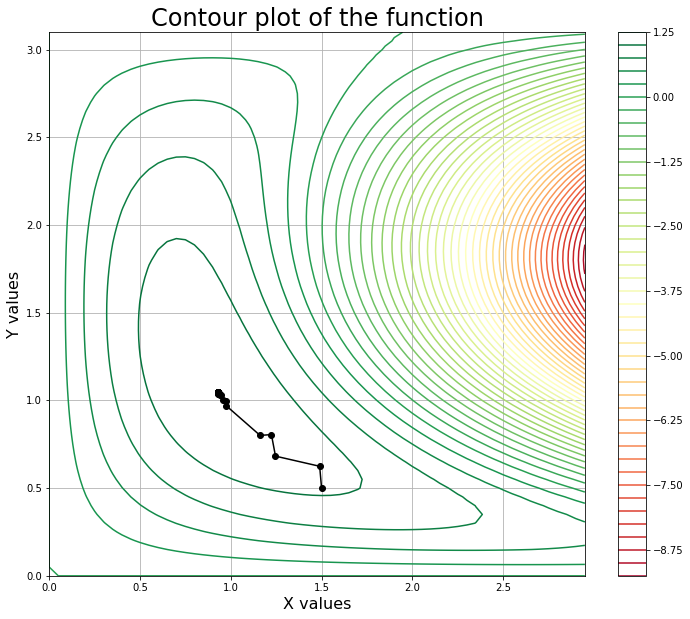

In [22]:
x = np.arange(0, 3, 0.05)
y = np.arange(0, np.pi, 0.05)

X, Y = np.meshgrid(x, y)
Z = (1/2)*((2*(3 - X*(np.sin(Y) + 1)) + X*np.cos(Y))*X*np.sin(Y))

plt.figure(figsize=(12, 10))
plt.contour(X, Y, Z, 50,cmap='RdYlGn')
plt.plot(x1, x2, 'o-', color='black')
plt.xlabel('X values', fontsize=16)
plt.ylabel('Y values', fontsize=16)
plt.title('Contour plot of the function', fontsize=24)
plt.colorbar()
plt.grid(True)
plt.show()

In [29]:
x1 = np.array([])
x2 = np.array([])
x = np.array([1.5, 0])
tol = np.inf
k = 0
store = []
step = 0.01

while tol >= 1e-5:
    x_new = x + step * grad_f(x)
    x1 = np.append(x1, x_new[0])
    x2 = np.append(x2, x_new[1])
    tol = np.linalg.norm(x_new - x, 2)
    x = x_new
    store.append(np.append(x, f(x)))
    k+=1
    
print("\nFunction Value: ", f(x), "\nAt X = ", x, " after", k, "iterations")


Function Value:  1.2057704755756375 
At X =  [0.92920329 1.04570113]  after 1167 iterations


In [31]:
pd.DataFrame(store, columns=['a', 'θ','A(a, θ)'])

,a,θ,"A(a, θ)"
0,1.500000,0.033750,0.111301
1,1.500472,0.065944,0.212509
2,1.501327,0.096594,0.304217
3,1.502487,0.125722,0.387050
4,1.503877,0.153360,0.461646
5,1.505434,0.179547,0.528643
6,1.507099,0.204330,0.588668
7,1.508824,0.227757,0.642329
8,1.510564,0.249882,0.690208
9,1.512284,0.270761,0.732853


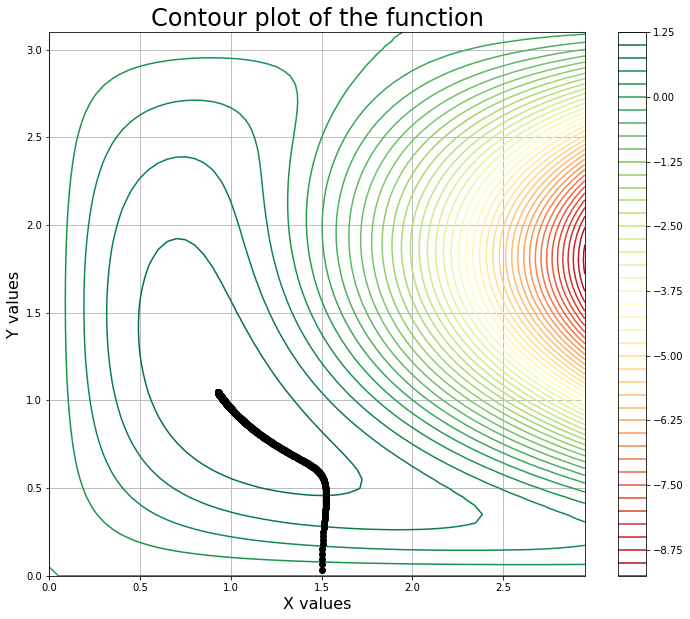

In [32]:
x = np.arange(0, 3, 0.05)
y = np.arange(0, np.pi, 0.05)

X, Y = np.meshgrid(x, y)
Z = (1/2)*((2*(3 - X*(np.sin(Y) + 1)) + X*np.cos(Y))*X*np.sin(Y))

plt.figure(figsize=(12, 10))
plt.contour(X, Y, Z, 50,cmap='RdYlGn')
plt.plot(x1, x2, 'o-', color='black')
plt.xlabel('X values', fontsize=16)
plt.ylabel('Y values', fontsize=16)
plt.title('Contour plot of the function', fontsize=24)
plt.colorbar()
plt.grid(True)
plt.show()